# Perth Housing Analysis

In [21]:
# Import dependencies 

import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np



In [22]:
# Import CSV 
perth_housing = pd.read_csv('Perth_housing_data.csv')
perth_housing.head()

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,1 Acorn Place,South Lake,565000,4,2,2.0,600,160,2003.0,18300,Cockburn Central Station,1800,09-2018\r,6164,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.828339,NaN
1,1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013.0,26900,Kwinana Station,4900,02-2019\r,6167,-32.193470,115.859554,ATWELL COLLEGE,5.524324,129.0
2,1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979.0,22600,Challis Station,1900,06-2015\r,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.0
3,1 Albert Street,Bellevue,255000,2,1,2.0,651,59,1953.0,17900,Midland Station,3600,07-2018\r,6056,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1.571401,NaN
4,1 Aman Place,Lockridge,325000,4,1,2.0,466,131,1998.0,11200,Bassendean Station,2000,11-2016\r,6054,-31.885790,115.947780,KIARA COLLEGE,1.514922,NaN


## Clean the data ## 


In [58]:
# Delete irrelevant columsn = garage, address, floor area.
new_perth_housing = perth_housing.drop(['ADDRESS', 'GARAGE', 'FLOOR_AREA', 'NEAREST_SCH_RANK'] , axis =1)

# Remove all null values including
new_perth_housing.dropna(how ='any', inplace = True)

# Convert School distance to meters and convert to integer
new_perth_housing['NEAREST_SCH_DIST'] = (new_perth_housing[['NEAREST_SCH_DIST']] * 1000).astype(int)

#Convert Build Year to Integer 
new_perth_housing['BUILD_YEAR'] = new_perth_housing['BUILD_YEAR'].astype(int)

# Remove post codes which are out of Perth
new_perth_housing = new_perth_housing[new_perth_housing['POSTCODE'] < 6200]

In [59]:
#Check the properties of the dataframe. 
new_perth_housing.shape

(30378, 15)

In [60]:
# Change datatype of DATE SOLD column to string to remove '/r' 
new_perth_housing[['DATE_SOLD']] = new_perth_housing[['DATE_SOLD']].astype('string')
new_perth_housing['DATE_SOLD'] = new_perth_housing['DATE_SOLD'].str[:7]

#Split Month and Year 
new_perth_housing['DATE_SOLD'] = pd.to_datetime(new_perth_housing['DATE_SOLD'])

# Add clean data to new frame
clean_perth_housing = new_perth_housing

In [61]:
clean_perth_housing.head(5)

,SUBURB,PRICE,BEDROOMS,BATHROOMS,LAND_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST
0,South Lake,565000,4,2,600,2003,18300,Cockburn Central Station,1800,2018-09-01,6164,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,828
1,Wandi,365000,3,2,351,2013,26900,Kwinana Station,4900,2019-02-01,6167,-32.193470,115.859554,ATWELL COLLEGE,5524
2,Camillo,287000,3,1,719,1979,22600,Challis Station,1900,2015-06-01,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1649
3,Bellevue,255000,2,1,651,1953,17900,Midland Station,3600,2018-07-01,6056,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1571
4,Lockridge,325000,4,1,466,1998,11200,Bassendean Station,2000,2016-11-01,6054,-31.885790,115.947780,KIARA COLLEGE,1514


In [65]:
# Create the bins and labels
size_bins = [0, 1000, 4000, 7000, 10000, 15000, 20000, 25000, 30000, 40000]
bin_label = ["<1","4-7","7-10","10-15","15-20","20-25", "25-30", "30-40",">40"]

# Catagorise distances based on bins
cbd_dist_summary = clean_perth_housing
cbd_dist_summary["Distance (km) to Perth CBD"] = pd.cut(clean_perth_housing["CBD_DIST"], size_bins, labels=bin_label)

# Calculate the average price per the bin catagories
cbd_house_price = cbd_dist_summary.groupby(["Distance (km) to Perth CBD"])["PRICE"].mean()

# Format presentation - add thousands seperator and dollar sign
cbd_house_price = round(cbd_house_price).map('{:,.0f}'.format)

# Create the dataframe
cbd_analysis = pd.DataFrame({'Average House Price ($)': cbd_house_price })

# Print analyses
cbd_analysis

,Average House Price ($)
Distance (km) to Perth CBD,
<1,"622,556"
4-7,"1,018,600"
7-10,"900,490"
10-15,"903,065"
15-20,"644,377"
20-25,"590,934"
25-30,"551,851"
30-40,"579,919"
>40,"451,639"


[]

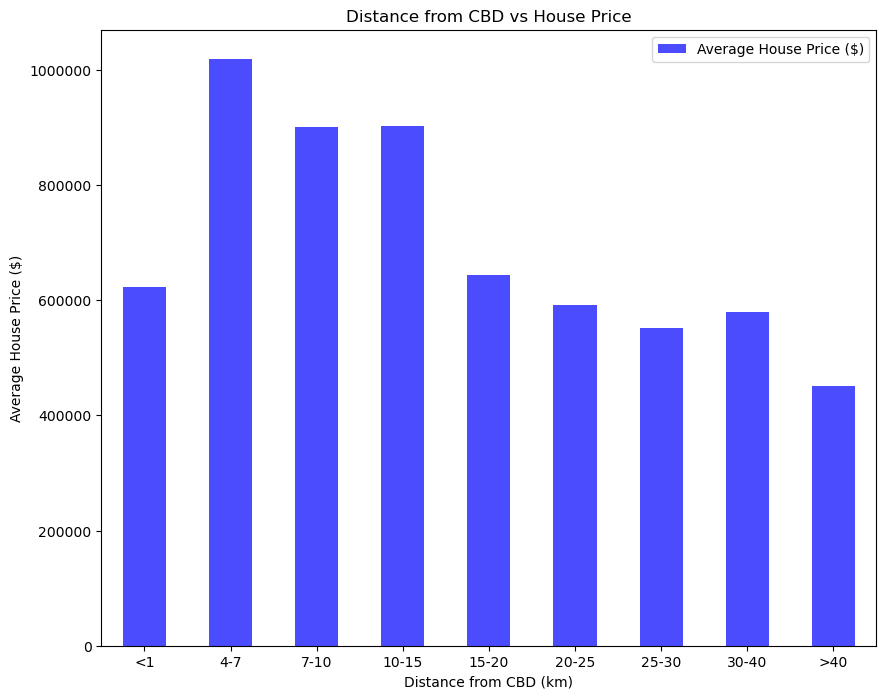

In [66]:
cbd_analysis['Average House Price ($)'] = cbd_analysis['Average House Price ($)'].str.replace(',', '').astype(float)

cbd_analysis.plot(kind='bar', figsize=(10,8), xlabel='Distance from CBD (km)', ylabel='Average House Price ($)', color='blue', alpha = 0.7)

plt.title("Distance from CBD vs House Price")
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.xticks(rotation = 0)
plt.plot()

In [67]:
station_data = pd.DataFrame({"Nearest Station Distance (m)": clean_perth_housing['NEAREST_STN_DIST'], "Price": clean_perth_housing['PRICE']})
#school_data = pd.DataFrame({"Nearest Station Distance (m)": clean_perth_housing['NEAREST_SCH'], "Price": clean_perth_housing['PRICE']})